In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('D:\\DATA SCIENCE\\Mall_customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
newdata=df.iloc[:,[3,4]].values # means all rows but 3 & 4 column
newdata

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

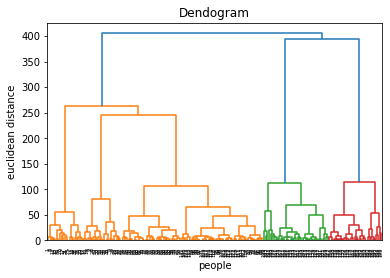

In [ ]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(newdata,method='ward'))
plt.title('Dendogram')
plt.xlabel('people')
plt.ylabel('euclidean distance')
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
# these 3 factors are needed like n_clu,affinity,linkage to make the agglomerative approach to work
agg=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=agg.fit_predict(newdata)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

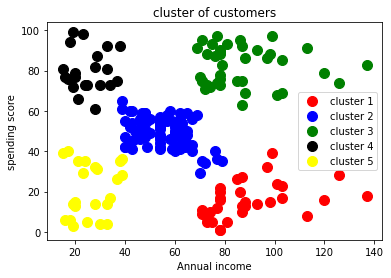

In [ ]:
plt.scatter(newdata[y_hc==0,0],newdata[y_hc==0,1],s=100,c='red',label='cluster 1')
plt.scatter(newdata[y_hc==1,0],newdata[y_hc==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(newdata[y_hc==2,0],newdata[y_hc==2,1],s=100,c='green',label='cluster 3')
plt.scatter(newdata[y_hc==3,0],newdata[y_hc==3,1],s=100,c='black',label='cluster 4')
plt.scatter(newdata[y_hc==4,0],newdata[y_hc==4,1],s=100,c='yellow',label='cluster 5')
plt.title('cluster of customers')
plt.xlabel('Annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()


In [ ]:
df['cluster']=y_hc
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


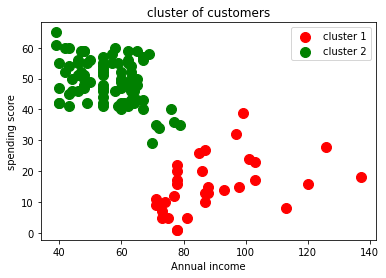

In [ ]:
c1=df[df.cluster==0]
plt.scatter(c1['Annual Income (k$)'],c1['Spending Score (1-100)'],s=100,c='red',label='cluster 1')

c2=df[df.cluster==1]
plt.scatter(c2['Annual Income (k$)'],c2['Spending Score (1-100)'],s=100,c='green',label='cluster 2')

plt.title('cluster of customers')
plt.xlabel('Annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()